In [19]:
using CSV
using DataFrames
using Tables
using CairoMakie

In [20]:
df_ack = CSV.read("ackley.csv", DataFrame);
s_ack = CSV.read("ackley_s.csv", DataFrame);
df_ros = CSV.read("rosenbrock.csv", DataFrame);
s_ros = CSV.read("rosenbrock_s.csv", DataFrame);
df_mic = CSV.read("michalewicz.csv", DataFrame);
s_mic = CSV.read("michalewicz_s.csv", DataFrame);

df_egg = CSV.read("eggholder.csv", DataFrame);
s_egg = CSV.read("eggholder_s.csv", DataFrame);
df_ran = CSV.read("rana.csv", DataFrame);
s_ran = CSV.read("rana_s.csv", DataFrame);

In [21]:
Makie.wong_colors()

In [22]:
# colors = [Makie.wong_colors()[1], Makie.wong_colors()[2]]
colors = [:steelblue4, :coral]

categories = String[]
append!(categories, fill("Parallel", 64));
append!(categories, fill("Serial", 64));

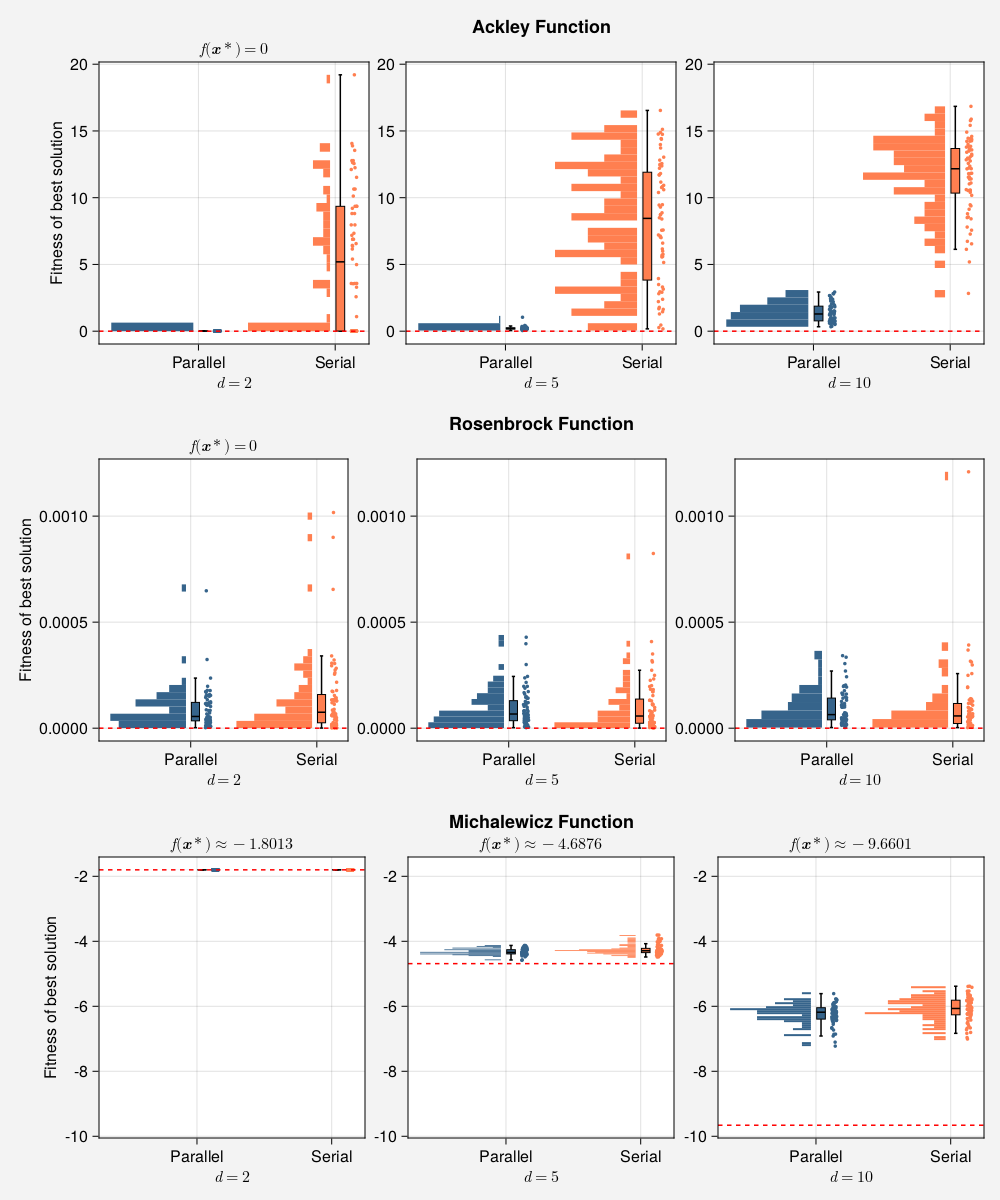

In [23]:
# Ackley

f1 = Figure(backgroundcolor = RGBf(0.95, 0.95, 0.95), resolution = (1000, 1200))

# create grid
grid_ackley = f1[1, 1] = GridLayout()
grid_rosenbrock = f1[2, 1] = GridLayout()
grid_michalewicz = f1[3, 1] = GridLayout()

# create axes
d2 = Axis(grid_ackley[1, 1], xlabel=L"$d=2$", ylabel = "Fitness of best solution",
          title=L"$f(\mathbf{x}*)=0$")
d5 = Axis(grid_ackley[1, 2], xlabel=L"$d=5")
d10 = Axis(grid_ackley[1, 3], xlabel=L"$d=10")

# link axes
linkyaxes!(d2, d5, d10)

# Fill axis d2
data_array = Float64[]
append!(data_array, df_ack.d2)
append!(data_array, s_ack.d2)

rainclouds!(d2, categories, data_array;
                #    xlabel="Dimension",
                   ylabel="Fitness of best solution",
                   clouds=hist,
                   markersize=5,
                   color=colors[indexin(categories, unique(categories))]
)

hlines!(d2, 0, color = :red, linestyle=:dash)

# Fill axis d5
data_array = Float64[]
append!(data_array, df_ack.d5)
append!(data_array, s_ack.d5)

rainclouds!(d5, categories, data_array;
            clouds=hist,
            markersize=5,
            color=colors[indexin(categories, unique(categories))]
)

hlines!(d5, 0, color = :red, linestyle=:dash)

# Fill axis d10
data_array = Float64[]
append!(data_array, df_ack.d10)
append!(data_array, s_ack.d10)

rainclouds!(d10, categories, data_array;
            clouds=hist,
            markersize=5,
            color=colors[indexin(categories, unique(categories))]
)

hlines!(d10, 0, color = :red, linestyle=:dash)

colgap!(grid_ackley, 10)
rowgap!(grid_ackley, 10)

Label(grid_ackley[1, 2:2, Top()], "Ackley Function",
    valign = :bottom,
    font = :bold,
    fontsize = 18,
    padding = (0, 0, 25, 0))

# Rosenbrock

categories = String[]
append!(categories, fill("Parallel", 64))
append!(categories, fill("Serial", 64))

#create axes
d2 = Axis(grid_rosenbrock[1, 1], xlabel=L"$d=2$", ylabel = "Fitness of best solution",
          title=L"$f(\mathbf{x}*)=0$")
d5 = Axis(grid_rosenbrock[1, 2], xlabel=L"$d=5")
d10 = Axis(grid_rosenbrock[1, 3], xlabel=L"$d=10")

#link axes
linkyaxes!(d2, d5, d10)

#fill d2
data_array = Float64[]
append!(data_array, df_ros.d2)
append!(data_array, s_ros.d2)

rainclouds!(d2, categories, data_array;
                #    xlabel="Dimension",
                   ylabel="Fitness of best solution",
                   clouds=hist,
                   markersize=5,
                   color=colors[indexin(categories, unique(categories))]
)

hlines!(d2, 0, color = :red, linestyle=:dash)


#fill d5
data_array = Float64[]
append!(data_array, df_ros.d5)
append!(data_array, s_ros.d5)

rainclouds!(d5, categories, data_array;
            clouds=hist,
            markersize=5,
            color=colors[indexin(categories, unique(categories))]
)

hlines!(d5, 0, color = :red, linestyle=:dash)


#fill d10
data_array = Float64[]
append!(data_array, df_ros.d10)
append!(data_array, s_ros.d10)

rainclouds!(d10, categories, data_array;
            clouds=hist,
            markersize=5,
            color=colors[indexin(categories, unique(categories))]
)

hlines!(d10, 0, color = :red, linestyle=:dash)

# spacing
colgap!(grid_rosenbrock, 10)
rowgap!(grid_rosenbrock, 10)

# label
Label(grid_rosenbrock[1, 2:2, Top()], "Rosenbrock Function",
    valign = :bottom,
    font = :bold,
    fontsize = 18,
    padding = (0, 0, 25, 0))


# Michalewicz
categories = String[]
append!(categories, fill("Parallel", 64))
append!(categories, fill("Serial", 64))

mins = [-1.8013, -4.6876, -9.6601]

d2 = Axis(grid_michalewicz[1, 1], xlabel=L"$d=2$", ylabel = "Fitness of best solution",
          title=L"$f(\mathbf{x}*) \approx %$(mins[1])$")
d5 = Axis(grid_michalewicz[1, 2], xlabel=L"$d=5", title=L"$f(\mathbf{x}*) \approx %$(mins[2])$")
d10 = Axis(grid_michalewicz[1, 3], xlabel=L"$d=10", title=L"$f(\mathbf{x}*) \approx %$(mins[3])$")

linkyaxes!(d2, d5, d10)

#fill d2
data_array = Float64[]
append!(data_array, df_mic.d2)
append!(data_array, s_mic.d2)

rainclouds!(d2, categories, data_array;
                #    xlabel="Dimension",
                   ylabel="Fitness of best solution",
                   clouds=hist,
                   markersize=5,
                   color=colors[indexin(categories, unique(categories))]
)

hlines!(d2, mins[1], color = :red, linestyle=:dash)

#fill d5
data_array = Float64[]
append!(data_array, df_mic.d5)
append!(data_array, s_mic.d5)

rainclouds!(d5, categories, data_array;
            clouds=hist,
            markersize=5,
            color=colors[indexin(categories, unique(categories))]
)

hlines!(d5, mins[2], color = :red, linestyle=:dash)

#fill d10
data_array = Float64[]
append!(data_array, df_mic.d10)
append!(data_array, s_mic.d10)

rainclouds!(d10, categories, data_array;
            clouds=hist,
            markersize=5,
            color=colors[indexin(categories, unique(categories))]
)

hlines!(d10, mins[3], color = :red, linestyle=:dash)

colgap!(grid_michalewicz, 10)
rowgap!(grid_michalewicz, 10)

Label(grid_michalewicz[1, 2:2, Top()], "Michalewicz Function",
    valign = :bottom,
    font = :bold,
    fontsize = 18,
    padding = (0, 0, 25, 0))
f1

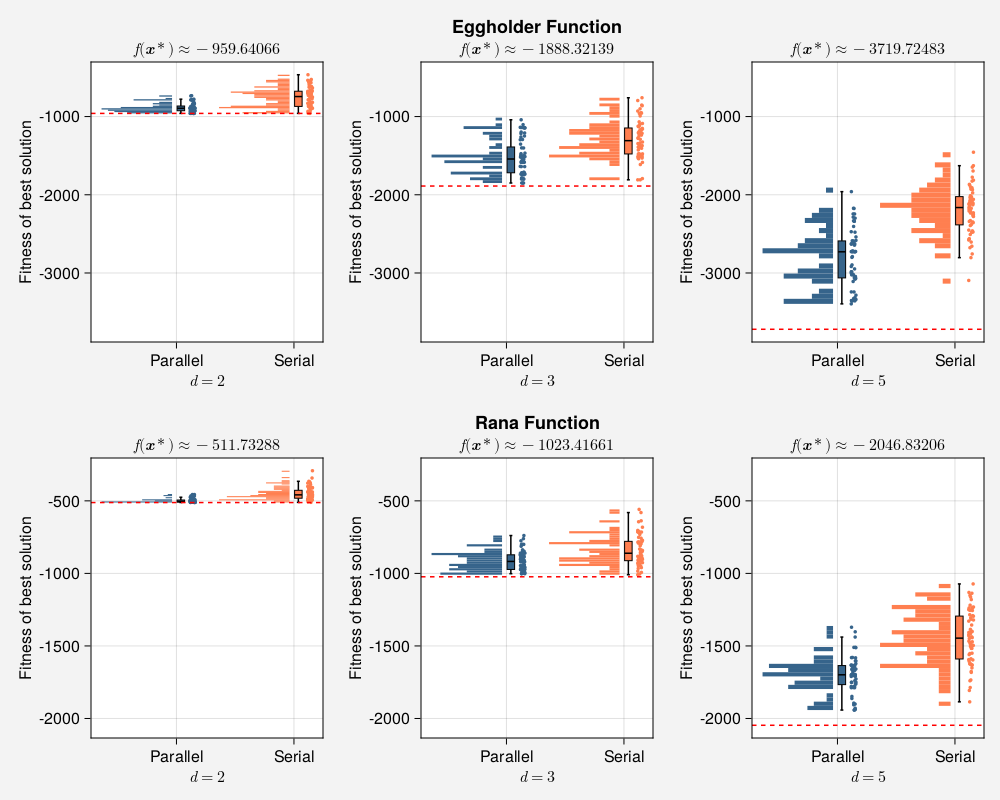

In [24]:
f2 = Figure(backgroundcolor = RGBf(0.95, 0.95, 0.95), resolution = (1000, 800))

# create grid
grid_egg = f2[1, 1] = GridLayout()
grid_ran = f2[2, 1] = GridLayout()

# Eggholder

mins = [-959.64066, -1888.32139, -3719.72483]

#create axes
d2 = Axis(grid_egg[1,1], xlabel=L"$d=2$", ylabel = "Fitness evaluation",
          title=L"$f(\mathbf{x}*) \approx %$(mins[1])$")
d3 = Axis(grid_egg[1,2], xlabel=L"$d=3$", ylabel = "Fitness evaluation",
          title=L"$f(\mathbf{x}*) \approx %$(mins[2])$")
d5 = Axis(grid_egg[1,3], xlabel=L"$d=5$", ylabel = "Fitness evaluation",
          title=L"$f(\mathbf{x}*) \approx %$(mins[3])$")


linkaxes!(d2,d3,d5)

#fill d2
data_array = Float64[]
append!(data_array, df_egg.d2)
append!(data_array, s_egg.d2)

rainclouds!(d2, categories, data_array;
            ylabel="Fitness of best solution",
            clouds=hist,
            markersize=5,
            color=colors[indexin(categories, unique(categories))]
)

hlines!(d2, mins[1], color = :red, linestyle=:dash)

#fill d3
data_array = Float64[]
append!(data_array, df_egg.d3)
append!(data_array, s_egg.d3)

rainclouds!(d3, categories, data_array;
            ylabel="Fitness of best solution",
            clouds=hist,
            markersize=5,
            color=colors[indexin(categories, unique(categories))]
)

hlines!(d3, mins[2], color = :red, linestyle=:dash)



Label(grid_egg[1, 2:2, Top()], "Eggholder Function",
        valign = :bottom,
        font = :bold,
        fontsize = 18,
        padding = (0, 0, 25, 0)
)

#fill d5
data_array = Float64[]
append!(data_array, df_egg.d5)
append!(data_array, s_egg.d5)

rainclouds!(d5, categories, data_array;
            ylabel="Fitness of best solution",
            clouds=hist,
            markersize=5,
            color=colors[indexin(categories, unique(categories))]
)

hlines!(d5, mins[3], color = :red, linestyle=:dash)

# Rana

mins = [-511.73288, -1023.41661, -2046.83206]

#create axes
d2 = Axis(grid_ran[1,1], xlabel=L"$d=2$", ylabel = "Fitness evaluation",
          title=L"$f(\mathbf{x}*) \approx %$(mins[1])$")
d3 = Axis(grid_ran[1,2], xlabel=L"$d=3$", ylabel = "Fitness evaluation",
          title=L"$f(\mathbf{x}*) \approx %$(mins[2])$")
d5 = Axis(grid_ran[1,3], xlabel=L"$d=5$", ylabel = "Fitness evaluation",
          title=L"$f(\mathbf{x}*) \approx %$(mins[3])$")


linkaxes!(d2,d3,d5)

#fill d2
data_array = Float64[]
append!(data_array, df_ran.d2)
append!(data_array, s_ran.d2)

rainclouds!(d2, categories, data_array;
            ylabel="Fitness of best solution",
            clouds=hist,
            markersize=5,
            color=colors[indexin(categories, unique(categories))]
)

hlines!(d2, mins[1], color = :red, linestyle=:dash)

#fill d3
data_array = Float64[]
append!(data_array, df_ran.d3)
append!(data_array, s_ran.d3)

rainclouds!(d3, categories, data_array;
            ylabel="Fitness of best solution",
            clouds=hist,
            markersize=5,
            color=colors[indexin(categories, unique(categories))]
)

hlines!(d3, mins[2], color = :red, linestyle=:dash)

#fill d5
data_array = Float64[]
append!(data_array, df_ran.d5)
append!(data_array, s_ran.d5)

rainclouds!(d5, categories, data_array;
            ylabel="Fitness of best solution",
            clouds=hist,
            markersize=5,
            color=colors[indexin(categories, unique(categories))]
)

hlines!(d5, mins[3], color = :red, linestyle=:dash)

Label(grid_ran[1, 2:2, Top()], "Rana Function",
        valign = :bottom,
        font = :bold,
        fontsize = 18,
        padding = (0, 0, 25, 0)
)

f2

In [25]:
save("figure1.pdf", f1, pt_per_unit = 1)
save("figure2.pdf", f2, pt_per_unit = 1)

CairoMakie.Screen{PDF}
